#1, Introduction
   In this project, we will use some of the technique we have learned this semester and apply to a movie dataset. We have two main goal, predicting the overall rating and establishing a recommandated system. and we have two main dataframe, the movie dataframe which contain about 5000 movies detail and the user dataframe that contain about 600 users' likes and dislikes.

In [ ]:
# import some of the needed package
import gdown
import os 
import pandas as pd
import ast
import numpy as np
import heapq
import copy 

#2, Predicted the overall rating 



##2.1, Data prepocessing
  The first step is to clean the dataset, droping the duplication and Nan values, converting categorical data to numberical data... below shows the detail step to convert the original dataset to a trainable dataframe

In [ ]:
#download the dataset
if not os.path.exists("tmdb_5000_credits.csv"):
  !gdown --id 1OEdArKvdQ_ENBMF9CNBaFOqNo7hUi1Tb
if not os.path.exists("tmdb_5000_movies.csv"):
  !gdown --id 1bishEGwPsY-F_MMAh33xKxnstaFdL2mL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OEdArKvdQ_ENBMF9CNBaFOqNo7hUi1Tb
To: /content/tmdb_5000_credits.csv
100% 40.0M/40.0M [00:00<00:00, 46.8MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bishEGwPsY-F_MMAh33xKxnstaFdL2mL
To: /content/tmdb_5000_movies.csv
100% 5.70M/5.70M [00:00<00:00, 138MB/s]


   We have to dataset that contain crew information and movie information, we need to join them together since both are useful information to predict the overall rating 

   The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.


In [ ]:
movies_df=pd.read_csv("tmdb_5000_movies.csv")
credits_df =pd.read_csv("tmdb_5000_credits.csv")
movies_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# four different technique to extract useful categorical value from a sequence of word or dictionary.
def extract_cast(obj):
    res = []
    for i in ast.literal_eval(obj):
        res.append(i['name'])
    return res[:1]
def extract_crew(obj):
    res = []
    director=[]
    for i in ast.literal_eval(obj):
        res.append([i['job'], i['name']])
    for i in res:
      if i[0] == 'Director':
        director.append(i[1])
    return director
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L
def extract(obj):
    res = []
    for i in ast.literal_eval(obj):
        res.append(i['name'])
    return res[:3]

In [ ]:
credits_df['crew']= credits_df['crew'].apply(extract_crew)
credits_df['cast']= credits_df['cast'].apply(extract)
movies_df['genres']= movies_df['genres'].apply(extract)
movies_df['keywords'] = movies_df['keywords'].apply(convert)
movies_df['production_companies']= movies_df['production_companies'].apply(extract_cast)
movies_df['production_countries']= movies_df['production_countries'].apply(extract_cast)
movies_df['release_date']= pd.to_datetime(movies_df['release_date'])
movies_df = movies_df.drop(['spoken_languages','tagline','overview','homepage','id'], axis =1 )
movies = movies_df.merge(credits_df, on='title')
movies.dropna()
movies.head(2)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy]","[culture clash, future, space war, space colon...",en,Avatar,150.437577,[Ingenious Film Partners],[United States of America],2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,[Walt Disney Pictures],[United States of America],2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [ ]:
# for the columns that have a list of simgle word, we can just convert it to a string 

# convert production_countries to string
prod=[]
for j in movies['production_countries']:
    if len(j) ==0:
      j.append('None')
    prod.append(j[0])
movies['production_countries']=prod
###################################

# convert production_companies to string 
prodc=[]
for t in movies['production_companies']:
    if len(t) ==0:
      t.append('None')
    prodc.append(t[0])
movies['production_companies']=prodc
####################################

#convert crew to string 
prodcr=[]
for t in movies['crew']:
    if len(t) ==0:
      t.append('None')
    prodcr.append(t[0])
movies['crew']=prodcr
movies.head(2)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy]","[culture clash, future, space war, space colon...",en,Avatar,150.437577,I,U,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",J
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,W,U,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",G


In [ ]:
# converting categorical data to numerical 
movies["production_countries"]= movies["production_countries"].astype('category')
movies["production_companies"]= movies["production_companies"].astype('category')
movies["crew"]= movies["crew"].astype('category')
movies["original_language"]= movies["original_language"].astype('category')
movies["status"]= movies["status"].astype('category')


movies["production_countries"]= movies["production_countries"].cat.codes
movies["production_companies"]= movies["production_companies"].cat.codes
movies["crew"]= movies["crew"].cat.codes
movies["status"]= movies["status"].cat.codes
movies["original_language"]= movies["original_language"].cat.codes
# dropping unnecessary columns
movies = movies.drop(['original_title','title',"movie_id"] ,axis=1)
movies.dtypes

budget                           int64
genres                          object
keywords                        object
original_language                 int8
popularity                     float64
production_companies              int8
production_countries              int8
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
status                            int8
vote_average                   float64
vote_count                       int64
cast                            object
crew                              int8
dtype: object

Now we have to take care of the columns of "cast", "genre","keyword", which contain a list of top 3 or top 5 class. our methods is keep the 100-500 most frequent word.  convert it to numerical data and extend to 3 or 5 columns 

In [ ]:
def keyrank1(movie_col, fre = 100):
  key=[]
  keyword=[]
  count=[]
  for i in movie_col:
    for j in i:
      if not j in key:
        key.append(j)
        count.append(1)
      else:
        count[key.index(j)]+=1
  max_number = heapq.nlargest(fre, count) 
  max_index = map(count.index, heapq.nlargest(fre, count)) 
  index=list(set(max_index))
  fre=[]
  for t in index:
    keyword.append(key[t])
    fre.append(count[t])
  rank=copy.deepcopy(fre)
  rank.sort(reverse=True)
  keyrank=[]
  for k in rank:
     keyrank.append(keyword[fre.index(k)])
  return keyrank

In [ ]:
m=copy.deepcopy(movies)
keyrank_keyword = keyrank1(movies['keywords'])
def app(movie, movie_col, t):
  for i in range(len(movie[movie_col])):
    q=[]
    for j in movie[movie_col][i]:
      if j in t:
        q.append(t.index(j)+1)
    q.sort()
    movie[movie_col][i]=q
  return m
m= app(m, 'keywords',keyrank_keyword) 
keyrank_genre = keyrank1(movies['genres'], fre =30)
m= app(m, 'genres',keyrank_genre)
keyrank_cast = keyrank1(movies['cast'], fre =1000)
m= app(m, 'cast',keyrank_cast)
m


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
0,237000000,"[3, 6, 11]","[15, 23, 42, 50]",7,150.437577,12,18,2009-12-10,2787965087,162.0,1,7.2,11800,"[17, 23, 29]",9
1,300000000,"[3, 6, 11]","[6, 44]",7,139.082615,26,18,2007-05-19,961000000,169.0,1,6.9,4500,"[4, 19, 27]",6
2,245000000,"[3, 6, 7]","[4, 17, 49]",7,107.376788,6,18,2015-10-26,880674609,148.0,1,6.3,4466,[],18
3,250000000,"[1, 3, 7]",[26],7,112.312950,15,18,2012-07-16,1084939099,165.0,1,7.6,9106,"[14, 16, 18]",2
4,260000000,"[3, 6, 9]","[4, 15, 23, 37]",7,43.926995,26,18,2012-03-07,284139100,132.0,1,6.1,2124,"[25, 31]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[3, 4, 7]",[],8,14.269792,6,12,1992-09-04,2040920,81.0,1,6.6,238,[],17
4805,9000,"[2, 5]",[],7,0.642552,17,13,2011-12-26,0,85.0,1,5.9,5,[],4
4806,0,"[1, 2, 5]",[],7,1.444476,9,18,2013-10-13,0,120.0,1,7.0,6,[],18
4807,0,[],[],7,0.857008,17,18,2012-05-03,0,98.0,1,5.7,7,[],3


In [ ]:
m[['genres1','genres2','genres3']] = pd.DataFrame(m.genres.tolist(), index= m.index)
m[['cast1','cast2','cast3']] = pd.DataFrame(m.cast.tolist(), index= m.index)
m = m.fillna(0)
m

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,cast,crew,genres1,genres2,genres3,cast1,cast2,cast3
0,237000000,"[3, 6, 11]","[15, 23, 42, 50]",7,150.437577,12,18,2009-12-10 00:00:00,2787965087,162.0,...,7.2,11800,"[17, 23, 29]",9,3.0,6.0,11.0,17.0,23.0,29.0
1,300000000,"[3, 6, 11]","[6, 44]",7,139.082615,26,18,2007-05-19 00:00:00,961000000,169.0,...,6.9,4500,"[4, 19, 27]",6,3.0,6.0,11.0,4.0,19.0,27.0
2,245000000,"[3, 6, 7]","[4, 17, 49]",7,107.376788,6,18,2015-10-26 00:00:00,880674609,148.0,...,6.3,4466,[],18,3.0,6.0,7.0,0.0,0.0,0.0
3,250000000,"[1, 3, 7]",[26],7,112.312950,15,18,2012-07-16 00:00:00,1084939099,165.0,...,7.6,9106,"[14, 16, 18]",2,1.0,3.0,7.0,14.0,16.0,18.0
4,260000000,"[3, 6, 9]","[4, 15, 23, 37]",7,43.926995,26,18,2012-03-07 00:00:00,284139100,132.0,...,6.1,2124,"[25, 31]",0,3.0,6.0,9.0,25.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[3, 4, 7]",[],8,14.269792,6,12,1992-09-04 00:00:00,2040920,81.0,...,6.6,238,[],17,3.0,4.0,7.0,0.0,0.0,0.0
4805,9000,"[2, 5]",[],7,0.642552,17,13,2011-12-26 00:00:00,0,85.0,...,5.9,5,[],4,2.0,5.0,0.0,0.0,0.0,0.0
4806,0,"[1, 2, 5]",[],7,1.444476,9,18,2013-10-13 00:00:00,0,120.0,...,7.0,6,[],18,1.0,2.0,5.0,0.0,0.0,0.0
4807,0,[],[],7,0.857008,17,18,2012-05-03 00:00:00,0,98.0,...,5.7,7,[],3,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
m["keyword1"]=0
m["keyword2"]=0
m["keyword3"]=0
m["keyword4"]=0
m["keyword5"]=0

for i in range(len(m['keywords'])):
  p=[]
  for j in range(5):
    if j < len(m['keywords'][i]):
      m["keyword"+str(j+1)][i]=(m['keywords'][i][j]+1)
    else:
      m["keyword"+str(j+1)][i]=0
m= m.drop(['genres','keywords','cast'],axis =1)
m


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,...,genres2,genres3,cast1,cast2,cast3,keyword1,keyword2,keyword3,keyword4,keyword5
0,237000000,7,150.437577,12,18,2009-12-10 00:00:00,2787965087,162.0,1,7.2,...,6.0,11.0,17.0,23.0,29.0,16,24,43,51,0
1,300000000,7,139.082615,26,18,2007-05-19 00:00:00,961000000,169.0,1,6.9,...,6.0,11.0,4.0,19.0,27.0,7,45,0,0,0
2,245000000,7,107.376788,6,18,2015-10-26 00:00:00,880674609,148.0,1,6.3,...,6.0,7.0,0.0,0.0,0.0,5,18,50,0,0
3,250000000,7,112.312950,15,18,2012-07-16 00:00:00,1084939099,165.0,1,7.6,...,3.0,7.0,14.0,16.0,18.0,27,0,0,0,0
4,260000000,7,43.926995,26,18,2012-03-07 00:00:00,284139100,132.0,1,6.1,...,6.0,9.0,25.0,31.0,0.0,5,16,24,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,8,14.269792,6,12,1992-09-04 00:00:00,2040920,81.0,1,6.6,...,4.0,7.0,0.0,0.0,0.0,0,0,0,0,0
4805,9000,7,0.642552,17,13,2011-12-26 00:00:00,0,85.0,1,5.9,...,5.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4806,0,7,1.444476,9,18,2013-10-13 00:00:00,0,120.0,1,7.0,...,2.0,5.0,0.0,0.0,0.0,0,0,0,0,0
4807,0,7,0.857008,17,18,2012-05-03 00:00:00,0,98.0,1,5.7,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
m.dtypes

budget                    int64
original_language          int8
popularity              float64
production_companies       int8
production_countries       int8
release_date             object
revenue                   int64
runtime                 float64
status                     int8
vote_average            float64
vote_count                int64
crew                       int8
genres1                 float64
genres2                 float64
genres3                 float64
cast1                   float64
cast2                   float64
cast3                   float64
keyword1                  int64
keyword2                  int64
keyword3                  int64
keyword4                  int64
keyword5                  int64
dtype: object

Now the dataset has been fully converted to a trainable dataset, to better understand the dataset we run some EDA to decide our further move on how to make the data better for trainning 

##2.2, EDA


In [ ]:
#EDA
!pip install pandasql
import pandas as pd
import pandasql as ps

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=fdaebe6e655cac3b7dcdc8c47bd4353f2a4309e8feaef77711d2d2f7b1459e70
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
# what are the top 20 mst popular english movies
movies_df = pd.read_csv("tmdb_5000_movies.csv")
query = """ select original_title, popularity 
from (select original_title, popularity from movies_df where original_language = 'en') 
order by popularity DESC limit 20 """
s= ps.sqldf(query,locals())
s

,original_title,popularity
0,Minions,875.581305
1,Interstellar,724.247784
2,Deadpool,514.569956
3,Guardians of the Galaxy,481.098624
4,Mad Max: Fury Road,434.278564
5,Jurassic World,418.708552
6,Pirates of the Caribbean: The Curse of the Bla...,271.972889
7,Dawn of the Planet of the Apes,243.791743
8,The Hunger Games: Mockingjay - Part 1,206.227151
9,Big Hero 6,203.734590


In [ ]:
#what are the most recently movie that vote average is greater than 7
query1= '''select title, release_date from movies_df where vote_average > 7 order by release_date DESC limit 20'''
s= ps.sqldf(query1,locals())
s

,title,release_date
0,Growing Up Smith,2017-02-03
1,Kicks,2016-09-09
2,Nerve,2016-07-27
3,Me Before You,2016-06-02
4,Departure,2016-05-20
5,The Wailing,2016-05-12
6,Captain America: Civil War,2016-04-27
7,Eddie the Eagle,2016-02-26
8,Race,2016-02-19
9,Deadpool,2016-02-09


##2.3, Trainning Model

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
m.head(5)

,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,...,genres2,genres3,cast1,cast2,cast3,keyword1,keyword2,keyword3,keyword4,keyword5
0,237000000,7,150.437577,12,18,2009-12-10 00:00:00,2787965087,162.0,1,7.2,...,6.0,11.0,17.0,23.0,29.0,16,24,43,51,0
1,300000000,7,139.082615,26,18,2007-05-19 00:00:00,961000000,169.0,1,6.9,...,6.0,11.0,4.0,19.0,27.0,7,45,0,0,0
2,245000000,7,107.376788,6,18,2015-10-26 00:00:00,880674609,148.0,1,6.3,...,6.0,7.0,0.0,0.0,0.0,5,18,50,0,0
3,250000000,7,112.312950,15,18,2012-07-16 00:00:00,1084939099,165.0,1,7.6,...,3.0,7.0,14.0,16.0,18.0,27,0,0,0,0
4,260000000,7,43.926995,26,18,2012-03-07 00:00:00,284139100,132.0,1,6.1,...,6.0,9.0,25.0,31.0,0.0,5,16,24,38,0


In [ ]:
X=m.drop(['release_date',"vote_average"],axis =1 )
y=m['vote_average']

###2.3.1 PCA + Standardization

In [ ]:
pca = PCA(n_components=8)
pca.fit(X)
X_pca=pca.transform(X)
print(pca.explained_variance_ratio_)

[9.73489531e-01 2.65104686e-02 2.09980580e-11 1.66718781e-14
 1.40217561e-14 5.65559219e-15 4.30183541e-15 2.53088399e-15]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###2.3.2 regressor fit

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators =200, max_depth=4, random_state=0)
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
print("rfRegressor", mean_squared_error(y_test, y_test_pred))

rfRegressor 0.7063580519813599


In [ ]:
XGB = xgb.XGBRegressor()
XGB.fit(X_train,y_train)
y_test_pred = XGB.predict(X_test)
from sklearn.metrics import mean_squared_error
print("XGBRegressor", mean_squared_error(y_test, y_test_pred))

[19:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 0.6022874359515867


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
hist = HistGradientBoostingRegressor(random_state=42)
voting = VotingRegressor(estimators=[('gbr', gbr), ('rf', rf), ('hist', hist)])
voting.fit(X_train, y_train)
y_pred_vote = voting.predict(X_test)
print("votingRegressor", mean_squared_error(y_test, y_pred_vote))

votingRegressor 0.6062515908625669


In [ ]:
hist = HistGradientBoostingRegressor(random_state=42, 
                                     loss="squared_error", 
                                     max_iter=2000, 
                                     max_leaf_nodes=400,
                                     min_samples_leaf=200,
                                     tol=1e-8,
                                     l2_regularization = 0.8)

y_pred_hist = hist.fit(X_train, y_train).predict(X_test)
print("HGBRegressor", mean_squared_error(y_test, y_pred_hist))

HGBRegressor 0.7319121040756067


We can observed that XGBregressor has the best proformance based on MSE. therefore, we will further tune the XGB regressor to see if we can inprove the MSE score 

##2,4 Optimatization(Hyperparameter tuning+cross validation)

In [ ]:
dmatrix = xgb.DMatrix(data=X, label=y)
params={ 'objective':'reg:squarederror',
         'max_depth': 7, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())
print('MSE: %.3f' % (cv_results['test-rmse-mean'].min())**2)

RMSE: 0.73
MSE: 0.532


With hyperparameter tuning, we successfully improve the mse from 0.6 to 0.5, which is a considerable improvement given our dataset only has about 5000 sample 

#3, Recommandation System

In [ ]:
if not os.path.exists('rating_small.csv'):
  !gdown --id 1EwDWGc1T6HmdQRuT7PSK_-UgKjL5Fjib

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EwDWGc1T6HmdQRuT7PSK_-UgKjL5Fjib
To: /content/ratings_small.csv
100% 2.44M/2.44M [00:00<00:00, 54.7MB/s]


In [ ]:
rating = pd.read_csv("ratings_small.csv")
rating.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


We have uploaded the user data, since the user data include more movie that our movies data, we need to keep only the rating on the movie we haved 

In [ ]:
query1= '''select userId, movieId, rating from rating where movieId <= 4809 '''
rating_1= ps.sqldf(query1,locals())
rating_1.shape
rating_collect=np.zeros((671, 4809))
### convert rating to a matrix for each users and each movies 
for i in range(rating_1.shape[0]):
  rating_collect[int(rating_1.loc[i][0])-1][int(rating_1.loc[i][1])-1] = rating_1.loc[i][2]

##3.1 Euclidean distance
   in this methods. We will find the most similar "old users" given the shorested Euclidean distance. 

In [ ]:
# given a "new user" and his/her random rating 
input =np.random.randint(6, size=4809)

# find the most similar user with the condition that rating at least 3 same movies 
dist =np.zeros(671)
time =np.zeros(671)
for i in range(len(input)):
  if input[i] !=0:
    for j in range(rating_collect.shape[0]):
      if rating_collect[j][i] !=0:
        dist[j] += (rating_collect[j][i] - input[i])**2
        time[j] += 1
smallest = float('inf')
index = 0 
for i in range(len(dist)):
  if time[i] > 3 and dist[i] < smallest:
    index = i
    smallest = dist[i]
print("similar_user_index",index)
similar_user = rating_collect[index]
recommand_movie_index =[]
iter =0
while len(recommand_movie_index) < 5 and iter < 4809:
  if input[similar_user.tolist().index(max(similar_user))] == 0:
    recommand_movie_index.append(similar_user.tolist().index(max(similar_user)))
    similar_user[similar_user.tolist().index(max(similar_user))] = 0
    iter =iter+1
  else:
    similar_user[similar_user.tolist().index(max(similar_user))] = 0
    iter +=1
print("recommand_movie_index", recommand_movie_index)
recommand_movie_name=[]
movies_df = pd.read_csv("tmdb_5000_movies.csv")
for i in recommand_movie_index:
  recommand_movie_name.append(movies_df['original_title'][i])
print("recommand_movie_name", recommand_movie_name)


similar_user_index 396
recommand_movie_index [3266, 518, 2760, 636, 1384]
recommand_movie_name ['Prom', 'Inspector Gadget', 'Room', 'The Santa Clause 2', 'Friends with Benefits']


In [ ]:
input =np.random.randint(6, size=4809)
movieId=[]
rating = []
userId = []
for i in range(len(input)):
  if input[i] !=0:
    movieId.append(i)
    rating.append(input[i])
    userId.append(max(rating_1["userId"])+1)
d= {"userId": userId, 'movieId': movieId, 'rating': rating}
rating_new = pd.DataFrame(data=d)
rating_new.head()



,userId,movieId,rating
0,672,0,4
1,672,1,5
2,672,2,5
3,672,3,1
4,672,5,5


In [ ]:
pd.concat([rating_1, rating_new])

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
3997,672,4802,4.0
3998,672,4803,3.0
3999,672,4804,4.0
4000,672,4807,5.0


Once we collect a new users data and reconmmanded for him/her, we transfer his/her likes and dislike to our database. this method work prefectly fine, However, our algorithm can sill be improved, once our databased become large enough, the runtime of this algorithm can be long. reducing "for loop" may be the next step 

##3.2 Demographic Filtering
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [ ]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')
C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)
q_movies = df2.copy().loc[df2['vote_count'] >= m]
print("average rating:", C)
print("90 quantile vote_count", m)
print(q_movies.shape)


average rating: 6.092171559442011
90 quantile vote_count 1838.4000000000015
(481, 20)


So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We used 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

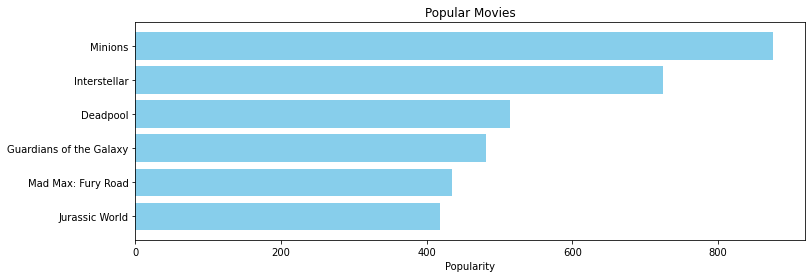

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

##3.3 Content Based Filtering
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

**Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
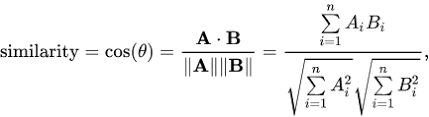

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

#4, Predicted new user's rating based on **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 17.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630178 sha256=2640368bd07509116563aa01d4a47341f376a7ff1172a9d38283f57172a77a13
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
rating=ratings[ratings['movieId']<5000]
svd=SVD()
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
df=kf.split(data)
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1 and check the ratings she/he has given.

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1, 302).est

2.8039981219461207

In [ ]:
import heapq
user=1
x=[]
for i in range(df2.shape[0]):
  est=svd.predict(user, i).est
  x.append(est)
max_index=map(x.index,heapq.nlargest(10,x))
print('The movies index user 1 would have high rating/want to see')
print(list(max_index))

The movies index user 1 would have high rating/want to see
[318, 1203, 858, 111, 1221, 1228, 926, 899, 2318, 745]


#5 Conclusion:
  We haved successfully accomplished the two main goals we set up at the beginning of this project. In the ML part, we successfully reduced the MSE to aroung 0.53, which is a considerable result. In the Recommandation part, we apply three different methods and it results in some recommendation that make sense. However, we are not able to evaluate our recommandation since the evaluation is based on real users. The next step is to collect data from users for our recommandation system and invent a method for evaluation.

On the recommandation part, we implement three different kinds of measure using information from User's data, we have successfully recommandate great movies for new users. 